# Assignment 3

### Student 1: 
### Student 2:

In [2]:
import os  # disable tensorflow warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [3]:
import tensorflow as tf
import numpy as np

In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [5]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255
y_train = y_train[:, 0]
y_test = y_test[:, 0]

In [6]:
# undersampling images to improve training speed
rand = np.random.RandomState(123)
ix = rand.choice(len(x_train), len(x_train)//10, True)
x_train = x_train[ix]
y_train = y_train[ix]

In [7]:
x_train.shape

(5000, 32, 32, 3)

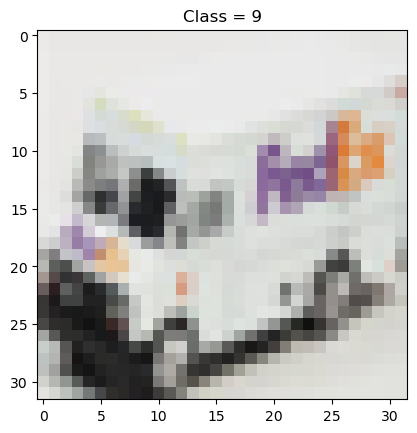

In [8]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.title(f'Class = {y_train[0]}')
plt.show()

In [9]:
x_train_flatten = x_train.reshape((x_train.shape[0], 32*32*3))
x_test_flatten = x_test.reshape((x_test.shape[0], 32*32*3))

## 1. Multi-Layer Perceptrons

Consider the following fully connected neural network:

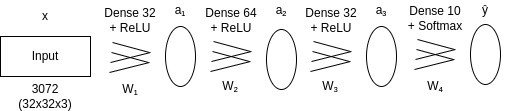

**a)** How many parameters (including biases) does this network have? Explicitly show your computations. 

**YOUR ANSWER HERE**

**b)** Derive the backward pass for $W_1$. To simplify, assume that $\frac{\partial L}{\partial a_2}$ is already computed. Show the shape of each variable you declare.

**YOUR ANSWER HERE**

**c)** Create this neural network in Keras.

In [24]:
# CODE HERE
from keras.models import Sequential
from keras.layers import Dense, Flatten

# Create a Sequential model
model = Sequential()


model.add(Dense(32,input_shape=(3072,)))

model.add(Dense(64, activation='relu'))

model.add(Dense(32, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 32)                98336     
                                                                 
 dense_11 (Dense)            (None, 64)                2112      
                                                                 
 dense_12 (Dense)            (None, 32)                2080      
                                                                 
 dense_13 (Dense)            (None, 10)                330       
                                                                 
Total params: 102858 (401.79 KB)
Trainable params: 102858 (401.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**d)** Train the neural network with a batch size of 32, for 100 epochs, using the Adam optimizer (with learning rate=1e-4). Reduce the batch size if you get memory errors.

In [27]:
# CODE HERE
from tensorflow.keras import optimizers
optimizer =optimizers.Adam(learning_rate=1e-4)
model.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train_flatten,y_train,epochs=100,batch_size=32)

Epoch 1/100
157/157 [==============================] - 1s 2ms/step - loss: 1.1300 - accuracy: 0.6152
Epoch 2/100
157/157 [==============================] - 0s 2ms/step - loss: 1.1260 - accuracy: 0.6164
Epoch 3/100
157/157 [==============================] - 0s 2ms/step - loss: 1.1134 - accuracy: 0.6232
Epoch 4/100
157/157 [==============================] - 0s 2ms/step - loss: 1.1137 - accuracy: 0.6246
Epoch 5/100
157/157 [==============================] - 0s 2ms/step - loss: 1.1099 - accuracy: 0.6224
Epoch 6/100
157/157 [==============================] - 0s 2ms/step - loss: 1.1022 - accuracy: 0.6286
Epoch 7/100
157/157 [==============================] - 0s 2ms/step - loss: 1.0905 - accuracy: 0.6298
Epoch 8/100
157/157 [==============================] - 0s 2ms/step - loss: 1.1044 - accuracy: 0.6248
Epoch 9/100
157/157 [==============================] - 0s 2ms/step - loss: 1.0851 - accuracy: 0.6396
Epoch 10/100
157/157 [==============================] - 0s 2ms/step - loss: 1.0818 - accura

**e)** Evaluate on the test set using accuracy as the metric.

In [28]:
# CODE HERE
test_loss, test_acc= model.evaluate(x_test_flatten,y_test, batch_size=32)
print('\nTest accuracy:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 2.1461 - accuracy: 0.3846

Test accuracy: 0.3846000134944916


**f)** Investigate how weights are initialized in Tensorflow/Keras. What distribution is sampled from? If we had to use one of the following - Uniform(0,1) or Uniform(-1,0) - which one would you expect to work best and why?

**YOUR ANSWER HERE**

## 2. Convolutional Neural Networks

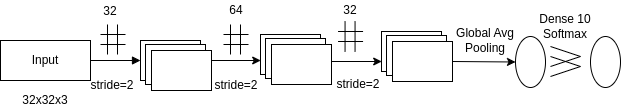

Global average pooling does the average across the height and width dimensions ($\mathbb R^{H\times W\times C}\to\mathbb R^C$).

**a)** How many parameters (including biases) does this network have? Explicitly show your computations. (Assume a regular 3x3 kernel.)

If instead the kernel was a 4-neighbor cross kernel (like in the image below), how many parameters would the neural network?

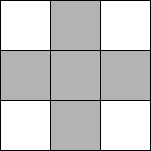

To calculate the number of parameters in a convolutional neural network (CNN), we need to consider the parameters associated with each layer, including weights and biases.

For a standard convolutional layer with a regular 3x3 kernel, the number of parameters is calculated as follows:

First Convolutional Layer (32x32x3 to 16x16x32):

Number of weights: 
3
×
3
×
3
×
32
3×3×3×32 (weights per filter, where 3 is the input channel, and 32 is the number of filters)
Number of biases: 
32
32 (one bias per filter)
Total parameters: 
(
3
×
3
×
3
×
32
)
+
32
(3×3×3×32)+32
Second Convolutional Layer (16x16x32 to 8x8x64):

Number of weights: 
3
×
3
×
32
×
64
3×3×32×64 (weights per filter, where 32 is the input channel, and 64 is the number of filters)
Number of biases: 
64
64 (one bias per filter)
Total parameters: 
(
3
×
3
×
32
×
64
)
+
64
(3×3×32×64)+64
Third Convolutional Layer (8x8x64 to 4x4x32):

Number of weights: 
3
×
3
×
64
×
32
3×3×64×32 (weights per filter, where 64 is the input channel, and 32 is the number of filters)
Number of biases: 
32
32 (one bias per filter)
Total parameters: 
(
3
×
3
×
64
×
32
)
+
32
(3×3×64×32)+32
Global Average Pooling:

No additional parameters.
Fully Connected (Dense) Layer (Flatten 4x4x32 to 10 neurons):

Number of weights: 
4
×
4
×
32
×
10
4×4×32×10 (weights for each neuron)
Number of biases: 
10
10 (one bias per neuron)
Total parameters: 
(
4
×
4
×
32
×
10
)
+
10
(4×4×32×10)+10
The total number of parameters is the sum of parameters from all layers.

If the kernel is a 4-neighbor cross kernel (assuming it's a 3x3 kernel with the central element and the four neighbors), the number of parameters in each convolutional layer would be different. For each filter, the number of weights would be 
5
5 (including the central element and the four neighbors), and the total number of biases would remain the same. The calculations would follow a similar pattern as above.

Let's calculate the number of parameters for each convolutional layer with a 4-neighbor cross kernel:

First Convolutional Layer (32x32x3 to 16x16x32):

Number of weights: 
3
×
3
×
5
×
32
3×3×5×32 (weights per filter, where 3 is the input channel, and 32 is the number of filters)
Number of biases: 
32
32 (one bias per filter)
Total parameters: 
(
3
×
3
×
5
×
32
)
+
32
(3×3×5×32)+32
Second Convolutional Layer (16x16x32 to 8x8x64):

Number of weights: 
3
×
3
×
5
×
64
3×3×5×64 (weights per filter, where 32 is the input channel, and 64 is the number of filters)
Number of biases: 
64
64 (one bias per filter)
Total parameters: 
(
3
×
3
×
5
×
64
)
+
64
(3×3×5×64)+64
Third Convolutional Layer (8x8x64 to 4x4x32):

Number of weights: 
3
×
3
×
5
×
32
3×3×5×32 (weights per filter, where 64 is the input channel, and 32 is the number of filters)
Number of biases: 
32
32 (one bias per filter)
Total parameters: 
(
3
×
3
×
5
×
32
)
+
32
(3×3×5×32)+32
Global Average Pooling:

No additional parameters.
Fully Connected (Dense) Layer (Flatten 4x4x32 to 10 neurons):

Number of weights: 
4
×
4
×
32
×
10
4×4×32×10 (weights for each neuron)
Number of biases: 
10
10 (one bias per neuron)
Total parameters: 
(
4
×
4
×
32
×
10
)
+
10
(4×4×32×10)+10
The total number of parameters is the sum of parameters from all layers

**b)** Why are there less parameters in 2.a) than in 1.a) if the number of output dimensions was the same across the neural network (32-64-32-10)?

The reason there are fewer parameters in the convolutional network (2.a) compared to the fully connected network (1.a) is due to parameter sharing and the local connectivity pattern of convolutional layers.

Fully Connected Network (1.a):

Each neuron in a layer is connected to every neuron in the previous layer, leading to a large number of parameters.
For the first dense layer (32 to a1), the number of parameters is 
3072
×
32
+
32
3072×32+32 (weights plus biases).
For the second dense layer (a1 to a2), it is 
32
×
64
+
64
32×64+64.
For the third dense layer (a2 to a3), it is 
64
×
32
+
32
64×32+32.
For the output layer (a3 to y), it is 
32
×
10
+
10
32×10+10.
The total number of parameters is the sum of the parameters from all layers.
Convolutional Network (2.a):

Convolutional layers use shared weights (kernels) for different regions of the input. This reduces the number of parameters.
Each filter in a convolutional layer is responsible for a specific feature across the entire input, promoting parameter reuse.
The calculation of parameters is based on the size of the filters and the number of filters in each layer, not the size of the input.
Despite having more layers, convolutional networks often have fewer parameters than fully connected networks when dealing with spatial data like images.
In summary, the convolutional network exploits local patterns and parameter sharing, which results in a more parameter-efficient architecture compared to the fully connected network. This is especially beneficial for image data where the spatial structure is important.

**c)** What would happen if we resized the image to 64x64 instead of 32x32? Would the number of parameters double?

Resizing the image from 32x32 to 64x64 would not necessarily double the number of parameters in the convolutional network. The number of parameters in a convolutional network is primarily influenced by the size of the filters (kernels) and the number of filters in each layer, not directly by the size of the input image.

Here are the reasons why resizing the image would not double the number of parameters:

Convolutional Layers:

The number of parameters in a convolutional layer is determined by the size of the filters, not the input size.
If the filter size remains the same, resizing the input would not change the number of parameters in the convolutional layers.
Pooling Layers:

Pooling layers, which are often used to downsample the spatial dimensions, do not introduce additional parameters.
They reduce the spatial resolution while preserving important features.
Fully Connected Layers:

The fully connected layers at the end of the network are affected by the size of the input, but they are typically not the dominant factor in the total number of parameters.
While resizing the image may affect the computational complexity, especially in terms of memory and computation time, it does not necessarily lead to a direct proportional increase in the number of parameters in a convolutional network. The crucial aspects are the architectural choices, such as filter sizes and the number of filters, which remain relatively constant if the network design is unchanged.

**d)** Create the neural network in Keras. Use kernel size = 3 in your convolutions.

In [13]:
# YOUR CODE HERE

**e)** Train the neural network with a batch size of 32, for 100 epochs, using the Adam optimizer (with learning rate=1e-4). Reduce the batch size if you get memory errors.

In [14]:
# YOUR CODE HERE

**f)** Evaluate on the test set using accuracy as the metric.

In [15]:
# YOUR CODE HERE